## 독버섯 분류하기
- 데이터셋 : mushrooms.csv
- 목적 : 독버섯 분류
- 피쳐 : 22개
- 타겟 : class
- 학습방법 : 지도학습 - 분류
- 알고리즘 : LogisticRegression, DecisionTreeClassifier, VotingClassifier

class: 독성 여부 (e: 식용 가능, p: 독성)  
cap-shape: 갓 모양 (b: 종 모양, c: 원뿔형, x: 볼록형, f: 평평함, k: 둥근꼭지, s: 함몰형)  
cap-surface: 갓 표면 (f: 섬유질, g: 홈이 파임, y: 비늘형, s: 매끈함)  
cap-color: 갓 색깔 (n: 갈색, b: 베이지색, c: 시나몬, g: 회색, r: 녹색, p: 분홍색,  u: 보라색, e: 빨간색, w: 흰색, y: 노란색)  
bruises: 상처 여부 (t: 상처 있음, f: 상처 없음)  
odor: 냄새 (a: 아몬드 향, l: 아니스 향, c: 크레오솟, y: 생선 냄새, f: 악취, m: 곰팡이 냄새, n: 냄새 없음, p: 강한 냄새, s: 매운 냄새)  
gill-attachment: 주름살 부착 (a: 부착됨, d: 내림형, f: 분리형, n: 각진형)  
gill-spacing: 주름살 간격 (c: 밀집, w: 혼잡, d: 드문드문)  
gill-size: 주름살 크기 (b: 넓음, n: 좁음)  
gill-color: 주름살 색깔 (k: 검정색, n: 갈색, b: 베이지색, h: 초콜릿 색, g: 회색, r: 녹색, o: 주황색, p: 분홍색, u: 보라색, e: 빨간색, w: 흰색, y: 노란색)  
stalk-shape: 줄기 형태 (e: 확대형, t: 좁아지는 형태)  
stalk-root: 줄기 뿌리 (b: 구형, c: 클럽형, u: 컵형, e: 동일, z: 근모상, r: 뿌리형)  
stalk-surface-above-ring: 줄기 위쪽 표면 (f: 섬유질, y: 비늘형, k: 실크같은, s: 매끈함)  
stalk-surface-below-ring: 줄기 아래쪽 표면 (f: 섬유질, y: 비늘형, k: 실크같은, s: 매끈함)  
stalk-color-above-ring: 줄기 위쪽 색깔 (n: 갈색, b: 베이지색, c: 시나몬, g: 회색, o: 주황색, p: 분홍색, e: 빨간색, w: 흰색, y: 노란색)  
stalk-color-below-ring: 줄기 아래쪽 색깔 (n: 갈색, b: 베이지색, c: 시나몬, g: 회색, o: 주황색, p: 분홍색, e: 빨간색, w: 흰색, y: 노란색)  
veil-type: 덮개 유형 (p: 부분 덮개)  
veil-color: 덮개 색깔 (n: 갈색, o: 주황색, w: 흰색, y: 노란색)  
ring-number: 고리 수 (n: 없음, o: 하나, t: 두 개)  
ring-type: 고리 유형 (c: 거미줄 모양, e: 사라짐, f: 펼쳐짐, l: 큰 고리, n: 없음, p: 늘어짐, s: 덮개형, z: 존형)  
spore-print-color: 포자 인쇄 색깔 (k: 검정색, n: 갈색, b: 베이지색, h: 초콜릿색, r: 녹색, o: 주황색, u: 보라색, w: 흰색, y: 노란색)  
population: 개체수 (a: 풍부, c: 군집, n: 다수, s: 흩어짐, v: 몇 개, y: 단독)  
habitat: 서식지 (g: 풀밭, l: 나뭇잎, m: 초원, p: 길가, u: 도시, w: 폐기물, d: 숲)  

[1] 모듈 준비

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[2] 데이터 준비

In [4]:
file_path = '../DATA/mushrooms.csv'
df = pd.read_csv(file_path)
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

[2-2] 결측치 처리

In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
#  sklearn-impute에 포함된 SimpleImputer 클래스이용
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r', nan], dtype=object)

In [ ]:
df_imputed['stalk-root'].unique()

array(['e', 'c', 'b', 'r'], dtype=object)

In [ ]:
print(df_imputed.isna().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


[2-3] 중복값 처리

In [ ]:
df_imputed.duplicated().sum()

0

[2-4] 이상치 처리 => 범주형이라 생략

[2-5] 범주형 인코딩
- pd.dummies()를 이용해 one-Hot Encoding

In [ ]:
df_encoded = pd.get_dummies(df_imputed, drop_first=True, dtype=int)

In [ ]:
df_encoded.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


[3] 상관관계 분석

In [ ]:
df_encoded.corr()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class_p,1.000000,0.023007,0.018526,0.163565,-0.060664,-0.026886,0.023007,0.095454,0.088677,-0.030910,...,-0.219529,-0.159572,0.443722,-0.107055,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087
cap-shape_c,0.023007,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,0.249631,-0.015038,0.015893,-0.001638,...,-0.005051,-0.009456,-0.022075,-0.011469,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453
cap-shape_f,0.018526,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,-0.006285,-0.093397,0.029076,-0.003687,...,-0.181191,-0.075804,0.034625,0.111346,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450
cap-shape_k,0.163565,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,0.010863,0.137988,0.015261,0.041662,...,0.013599,-0.089360,0.172707,-0.170081,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003
cap-shape_s,-0.060664,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,-0.001396,-0.042607,-0.051272,-0.004641,...,-0.014311,-0.026791,0.000341,0.044603,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_l,0.155150,0.065707,-0.052326,0.235108,-0.021242,-0.096639,0.065707,0.190799,-0.006819,0.107833,...,-0.076868,-0.143906,0.248675,-0.174539,-0.202512,1.000000,-0.065222,-0.136749,-0.073577,-0.052553
habitat_m,-0.138627,-0.004286,-0.129312,-0.065047,-0.012142,-0.004529,-0.004286,0.077081,0.039697,-0.014249,...,0.347262,0.152473,-0.144434,-0.099772,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041
habitat_p,0.323346,-0.008985,0.021891,0.090538,-0.025458,-0.029042,-0.008985,-0.039574,0.117915,0.008698,...,-0.092129,-0.125366,0.169228,0.040714,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986
habitat_u,0.112078,-0.004835,0.030636,-0.073380,0.288697,0.002845,-0.004835,0.117548,-0.100248,-0.016074,...,-0.049569,0.130450,0.001180,-0.042888,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889


[4] 탐색적 분석

In [ ]:
def draw_bar(df):
    col = 3
    row = (len(df.columns) + col - 1) // col
    colors = [
    "#AED6F1",  # 옅은 하늘색
    "#A9DFBF",  # 옅은 초록색
    "#F9E79F",  # 옅은 노란색
    "#F5B7B1",  # 옅은 핑크색
    "#D2B4DE",  # 옅은 보라색
    "#FAD7A0",  # 옅은 주황색
    "#D5DBDB",  # 옅은 회색
    "#A3E4D7",  # 옅은 민트색
    "#D7BDE2",  # 옅은 연보라색
    "#F5CBA7",  # 옅은 살구색
]

    plt.figure(figsize=(15, row * 4))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(row, col, i)
        df[column].value_counts().plot(kind='bar', color=colors)
        plt.title(column)
        plt.xticks(rotation=360)
    plt.tight_layout()
    plt.show()

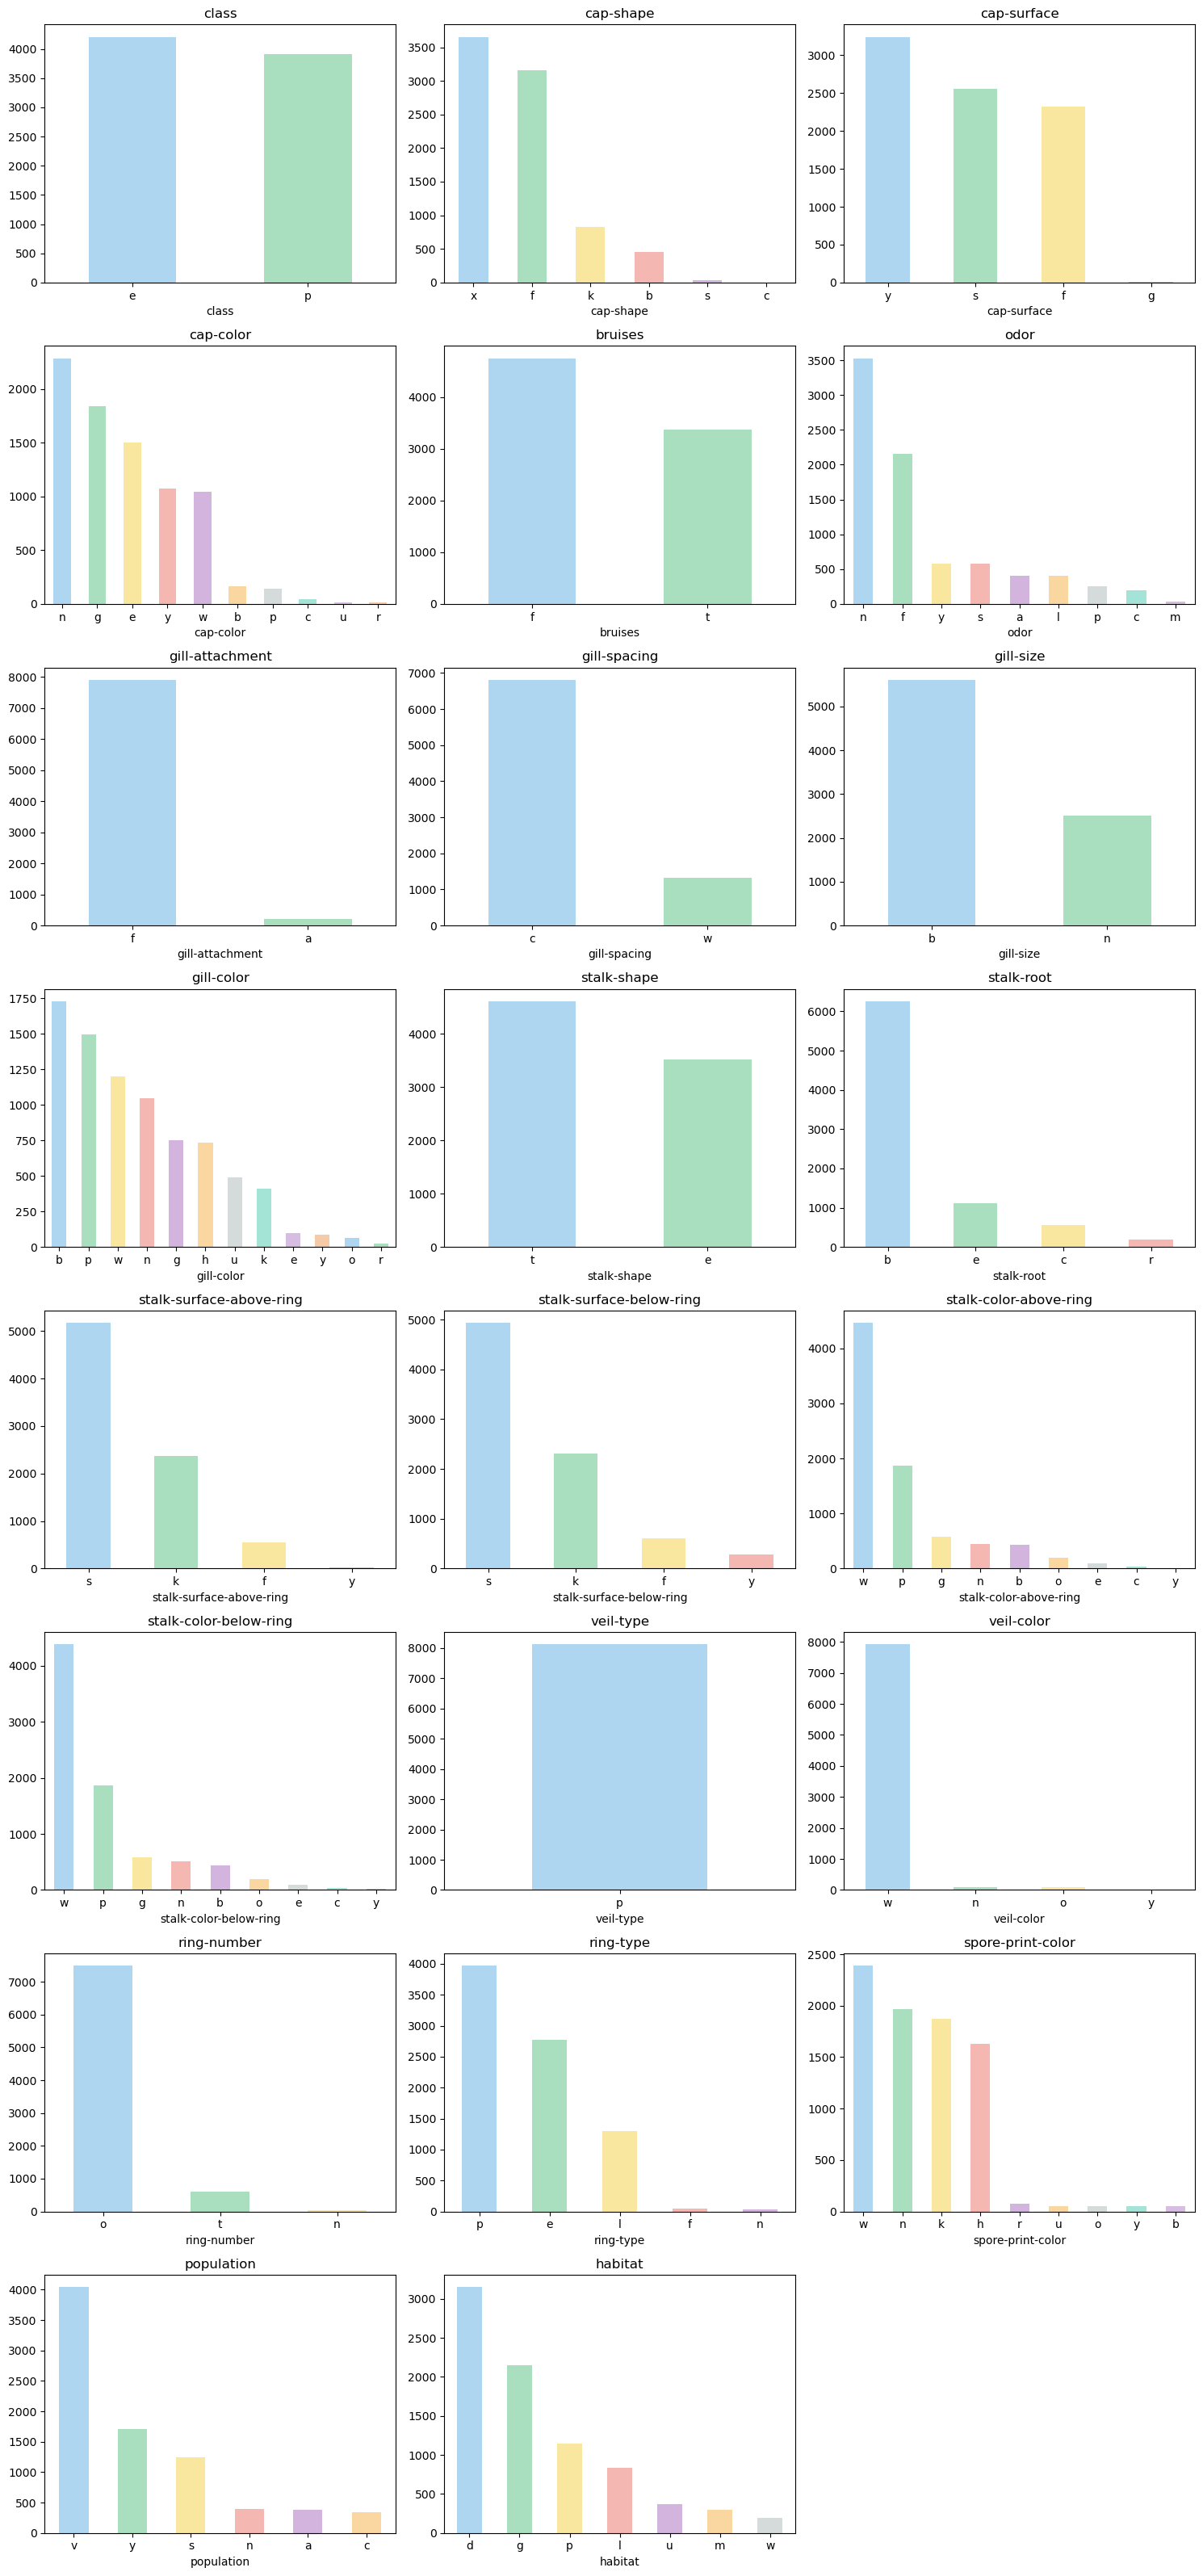

In [ ]:
draw_bar(df_imputed)

[5] 학습준비

[5-1] 피쳐/ 타겟 설정

In [ ]:
drop_df = df_imputed.drop(columns=['class', 'veil-type']) # veil-type에 하나만들어있어서 삭제
features = pd.get_dummies(drop_df, drop_first=True, dtype=int) # 다시 원핫인코딩
target = df_imputed['class']

print(f'features : {features.shape}, {features.ndim}D')
print(f'target : {target.shape}, {target.ndim}D')

features : (8124, 94), 2D
target : (8124,), 1D


[5-2] 훈련/테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target,  random_state=10)

[6] 모델 생성

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

[6-1] LogisticRegression

In [ ]:
lr_params = {
    'C':[0.1, 1, 10, 100], # cost function , 값이 크면 훈련을 더복잡하게 하므로 규제가약해짐
    'max_iter': [100,300,500,1000],
    'solver' : ['liblinear', 'sag', 'saga']
}

In [ ]:
# 모델 인스턴스 생성
lr_model = LogisticRegression()

# GridSearchCV 인스턴스 생성
lr_searchCV=GridSearchCV(lr_model, lr_params, cv=5, verbose=True, return_train_score=True, scoring='accuracy')
lr_searchCV.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\KDP15\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KDP15\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KDP15\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KDP15\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KDP15\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KDP15\anaconda3\envs\ML_38\lib\site-packages\s

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'max_iter': [100, 300, 500, 1000],
                         'solver': ['liblinear', 'sag', 'saga']},
             return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
lr_best_model = lr_searchCV.best_estimator_

In [ ]:
#성능평가
print('best model parameter:', lr_searchCV.best_params_)
print(f'train_ accuracy score: {lr_best_model.score(X_train, y_train):.2f}')
print(f'test_ accuracy score: {lr_best_model.score(X_test, y_test):.2f}')

best model parameter: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
train_ accuracy score: 0.99
test_ accuracy score: 0.99


[6-2] DecisionTreeClassifier

In [ ]:
dt_params = {'max_depth' : [4,3,2,1],
             'min_samples_leaf': [5,3,2]}

In [ ]:
# 모델 인스턴스 생성
dt_model = DecisionTreeClassifier(random_state=10)

# GridSearchCV 인스턴스 생성
dt_searchCV=GridSearchCV(dt_model, dt_params, cv=5, verbose=True, return_train_score=True, scoring='accuracy')
dt_searchCV.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
dt_best_model = dt_searchCV.best_estimator_

In [ ]:
# 성능평가
print('best model parameter:', dt_searchCV.best_params_)
print(f'train_ accuracy score: {dt_best_model.score(X_train, y_train):.2f}')
print(f'test_ accuracy score: {dt_best_model.score(X_test, y_test):.2f}')

best model parameter: {'max_depth': 4, 'min_samples_leaf': 5}
train_ accuracy score: 0.99
test_ accuracy score: 0.99


[6-3] votingclassifier

In [ ]:
v_params = {'voting' : ['hard', 'soft']}

In [ ]:
# 모델 인스턴스 생성
v_model = VotingClassifier(estimators=[('dt_model', dt_best_model), ('lr_model', lr_best_model)], voting='soft')

# GridSearchCV 인스턴스 생성
v_searchCV=GridSearchCV(v_model, v_params, cv=5, verbose=True, return_train_score=True, scoring='accuracy')
v_searchCV.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('dt_model',
                                                     DecisionTreeClassifier(max_depth=4,
                                                                            min_samples_leaf=5,
                                                                            random_state=10)),
                                                    ('lr_model',
                                                     LogisticRegression(C=10,
                                                                        solver='liblinear'))],
                                        voting='soft'),
             param_grid={'voting': ['hard', 'soft']}, return_train_score=True,
             scoring='accuracy', verbose=True)

In [ ]:
v_best_model = v_searchCV.best_estimator_

In [ ]:
# 성능평가
print('best model parameter:', v_searchCV.best_params_)
print(f'train_ accuracy score: {v_best_model.score(X_train, y_train):.2f}')
print(f'test_ accuracy score: {v_best_model.score(X_test, y_test):.2f}')

best model parameter: {'voting': 'soft'}
train_ accuracy score: 0.99
test_ accuracy score: 0.99


[7] 튜닝

과대적합이 생기는것 같으니 DecisionTreeClassifier의 중요도를 이용해 영향이 큰 변수찾기

In [ ]:
importances = dt_best_model.feature_importances_

In [ ]:
important_features = dict(zip(dt_best_model.feature_names_in_[importances > 0], importances[importances > 0]))

In [ ]:
important_features

{'odor_n': 0.6398985247114565,
 'gill-size_n': 0.005968340069075831,
 'stalk-root_c': 0.18287146012212932,
 'stalk-surface-below-ring_y': 0.11851765690619222,
 'spore-print-color_r': 0.030768850631155666,
 'spore-print-color_u': 0.02197516755999049}

In [ ]:
features_name = list(important_features.keys())
importances = list(important_features.values())

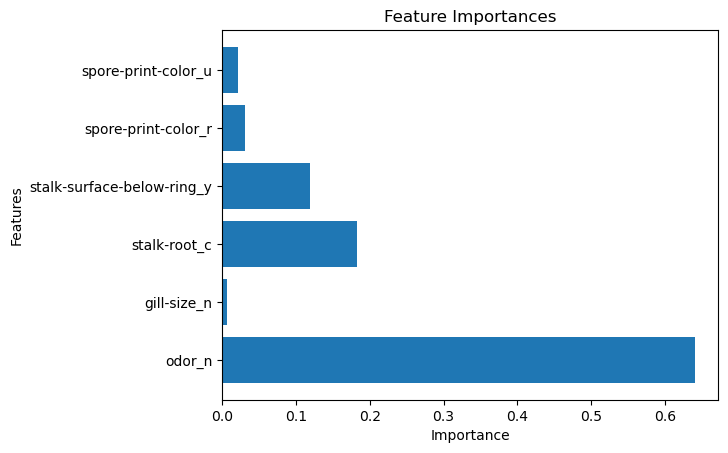

In [ ]:
plt.barh(features_name, importances,align='center')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

냄새가 중요한 변수였다

6가지 변수로만 다시 모델을 생성

In [ ]:
new_features = features[features_name]
print(f'features : {new_features.shape}, {new_features.ndim}D')

features : (8124, 6), 2D


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_features, target, test_size=0.2, stratify=target,  random_state=10)

LogisticRegression

In [ ]:
lr_params = {
    'C':[0.1, 1, 10, 100], # cost function , 값이 크면 훈련을 더복잡하게 하므로 규제가약해짐
    'max_iter': [100,200,300],
}

In [ ]:
# 모델 인스턴스 생성
lr_model = LogisticRegression()

# GridSearchCV 인스턴스 생성
lr_searchCV=GridSearchCV(lr_model, lr_params, cv=5, verbose=True, return_train_score=True, scoring='accuracy')
lr_searchCV.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
lr_best_model = lr_searchCV.best_estimator_

In [ ]:
#성능평가
print('best model parameter:', lr_searchCV.best_params_)
print(f'train_ accuracy score: {lr_best_model.score(X_train, y_train):.2f}')
print(f'test_ accuracy score: {lr_best_model.score(X_test, y_test):.2f}')

best model parameter: {'C': 1, 'max_iter': 100}
train_ accuracy score: 0.99
test_ accuracy score: 0.98


DecisionTreeClassifier

In [ ]:
dt_params = {'max_depth' : [4,3,2,1],
             'min_samples_leaf': [5,3,2]}

In [ ]:
# 모델 인스턴스 생성
dt_model = DecisionTreeClassifier(random_state=10)

# GridSearchCV 인스턴스 생성
dt_searchCV=GridSearchCV(dt_model, dt_params, cv=5, verbose=True, return_train_score=True, scoring='accuracy')
dt_searchCV.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
dt_best_model = dt_searchCV.best_estimator_

In [ ]:
# 성능평가
print('best model parameter:', dt_searchCV.best_params_)
print(f'train_ accuracy score: {dt_best_model.score(X_train, y_train):.2f}')
print(f'test_ accuracy score: {dt_best_model.score(X_test, y_test):.2f}')

best model parameter: {'max_depth': 4, 'min_samples_leaf': 5}
train_ accuracy score: 0.99
test_ accuracy score: 0.99


votingclassifier

In [ ]:
v_params = {'voting' : ['hard', 'soft']}

In [ ]:
# 모델 인스턴스 생성
v_model = VotingClassifier(estimators=[('dt_model', dt_best_model), ('lr_model', lr_best_model)], voting='soft')

# GridSearchCV 인스턴스 생성
v_searchCV=GridSearchCV(v_model, v_params, cv=5, verbose=True, return_train_score=True, scoring='accuracy')
v_searchCV.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('dt_model',
                                                     DecisionTreeClassifier(max_depth=4,
                                                                            min_samples_leaf=5,
                                                                            random_state=10)),
                                                    ('lr_model',
                                                     LogisticRegression(C=1))],
                                        voting='soft'),
             param_grid={'voting': ['hard', 'soft']}, return_train_score=True,
             scoring='accuracy', verbose=True)

In [ ]:
v_best_model = v_searchCV.best_estimator_

In [ ]:
# 성능평가
print('best model parameter:', v_searchCV.best_params_)
print(f'train_ accuracy score: {v_best_model.score(X_train, y_train):.2f}')
print(f'test_ accuracy score: {v_best_model.score(X_test, y_test):.2f}')

best model parameter: {'voting': 'soft'}
train_ accuracy score: 0.99
test_ accuracy score: 0.99


## 변수를 줄임으로써 모델의 복잡성을 줄였으니 성공?